<a href="https://colab.research.google.com/github/cvrl10/MLA_CPA/blob/main/MLA1_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1** </br>
**Carl Archemetre** </br>
**CS430-ON** </br>
**Machine Learning in the Cloud**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from google.colab import drive

drive.mount("/content/gdrive")
df = pd.read_csv("/content/gdrive/MyDrive/CS430/Module1/weather_2012.csv")

Mounted at /content/gdrive


Write the code to display the first five rows of the dataset, the last five rows of the dataset and a sample of five random rows from the dataset.

In [4]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
4114,6/20/2012 10:00,27.4,19.3,61,9,24.1,101.06,Mostly Cloudy
7830,11/22/2012 6:00,-0.3,-2.6,84,9,19.3,101.84,Clear
3341,5/19/2012 5:00,11.8,6.4,69,7,48.3,101.70,Mostly Cloudy
3155,5/11/2012 11:00,14.6,-0.9,34,24,48.3,100.65,Mainly Clear
601,1/26/2012 1:00,-7.0,-12.1,67,4,25.0,101.95,Clear


Write the code to display a list of all of the columns in the dataset.

In [17]:
df.columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

The column names are unwieldy for our purposes. Rename them according to this list {date_time, temp_c, dew_point, relative_humidity, wind_speed, visibility, pressure, and weather}

In [23]:
columns_name = ["date_time", "temp_c", "dew_point", "relative_humidity", "wind_speed", "visibility", "pressure", "weather"]

for i in range(len(df.columns)):
  df.rename(columns={df.columns[i]: columns_name[i]}, inplace=True)

Most of the data in the dataset are numerical, write the code to get some standard statistics for each column (e.g. count, mean, etc.)

In [24]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Write the code to add a column named temp_f to the dataset that contains the temperature from temp_c represented in Fahrenheit. 

In [32]:
temp_f = [data*(9/5)+32 for data in df["temp_c"]]
df["temp_f"] = temp_f

Write the code to rearrange the columns in the dataset so temp_f appears immediately before temp_c.

In [216]:
order = df.columns.tolist()
temp_f = order.pop()
order.insert(1, temp_f)
df = df.reindex(columns=order)

Write the code to display the data types of all the columns in the dataset.

In [129]:
df.dtypes

date_time            datetime64[ns]
weather                      object
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
dtype: object

The date_time column is not actually considered a date by Pandas.  Write the code to convert this column to a date/time column and to verify the conversion was successful.

In [219]:
dates = pd.to_datetime(df.date_time)
df.date_time = dates
df.head()

,date_time,month,pressure,weather,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility
0,2012-01-01 00:00:00,1,101.24,Fog,28.76,-1.8,-3.9,86,4,8.0
1,2012-01-01 01:00:00,1,101.24,Fog,28.76,-1.8,-3.7,87,4,8.0
2,2012-01-01 02:00:00,1,101.26,"Freezing Drizzle,Fog",28.76,-1.8,-3.4,89,7,4.0
3,2012-01-01 03:00:00,1,101.27,"Freezing Drizzle,Fog",29.30,-1.5,-3.2,88,6,4.0
4,2012-01-01 04:00:00,1,101.23,Fog,29.30,-1.5,-3.3,88,7,4.8


Write the code to get the average temperature (in F) for each month and write it into an object called monthly_avg. This object should be a Pandas Series which is similar to a Pandas Dataframe except it only has one column.  You will plot this data later.

In [151]:
months = [date.month for date in df.date_time]
df["month"] = months
monthly_avg = df["temp_f"].groupby(df["month"]).mean()
df.drop(columns="month")

,date_time,pressure,weather,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility
0,2012-01-01 00:00:00,101.24,Fog,28.76,-1.8,-3.9,86,4,8.0
1,2012-01-01 01:00:00,101.24,Fog,28.76,-1.8,-3.7,87,4,8.0
2,2012-01-01 02:00:00,101.26,"Freezing Drizzle,Fog",28.76,-1.8,-3.4,89,7,4.0
3,2012-01-01 03:00:00,101.27,"Freezing Drizzle,Fog",29.30,-1.5,-3.2,88,6,4.0
4,2012-01-01 04:00:00,101.23,Fog,29.30,-1.5,-3.3,88,7,4.8
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,100.13,Snow,32.18,0.1,-2.7,81,30,9.7
8780,2012-12-31 20:00:00,100.03,Snow,32.36,0.2,-2.4,83,24,9.7
8781,2012-12-31 21:00:00,99.95,Snow,31.10,-0.5,-1.5,93,28,4.8
8782,2012-12-31 22:00:00,99.91,Snow,31.64,-0.2,-1.8,89,28,9.7


Write code to generate a scatterplot that compares the temperature against the relative humidity.  The size of your plot should be 20 x 10.

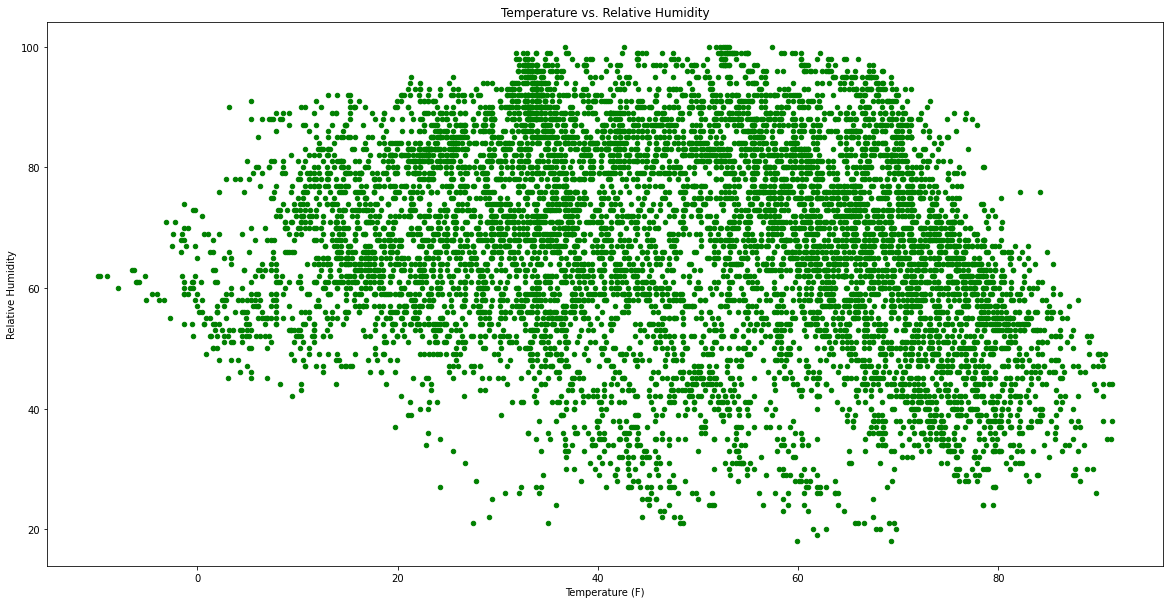

In [163]:
df.plot(kind="scatter", x="temp_f", y="relative_humidity", figsize=(20, 10), 
        title="Temperature vs. Relative Humidity", xlabel="Temperature (F)", ylabel="Relative Humidity", color="green")

Write the code to generate a line chart that shows the average temperature per month. The size of your plot should 20 x 10.

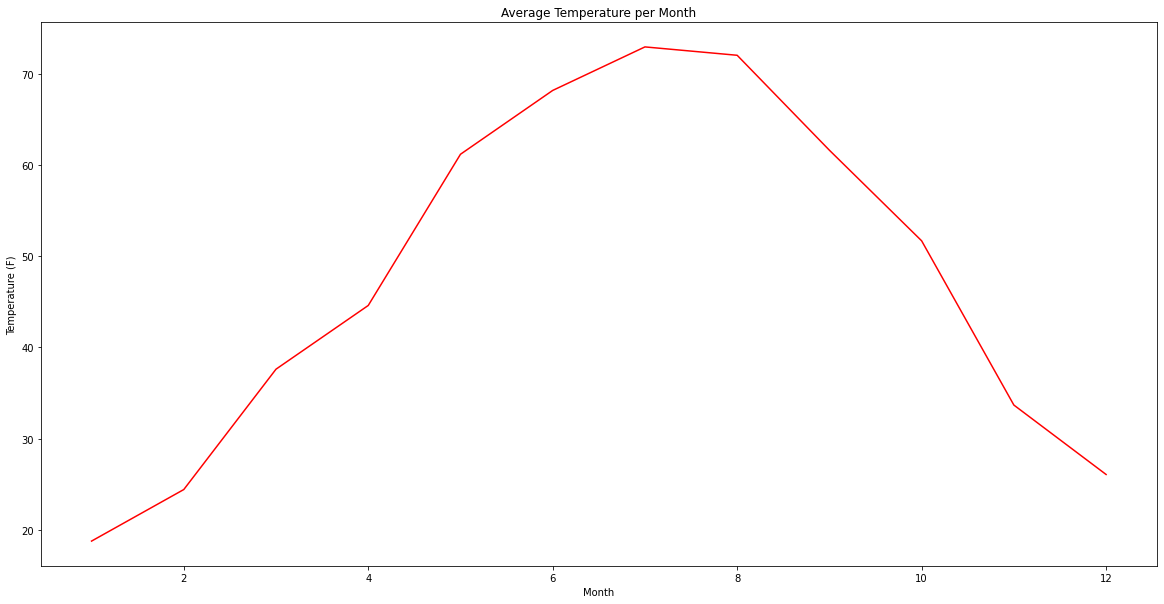

In [220]:
plt.figure(figsize=(20, 10))
plt.title("Average Temperature per Month")
plt.xlabel("Month")
plt.ylabel("Temperature (F)")
plt.plot(monthly_avg, color="red")

Write the code to generate a box plot. The size of your plot should 20 x 10.

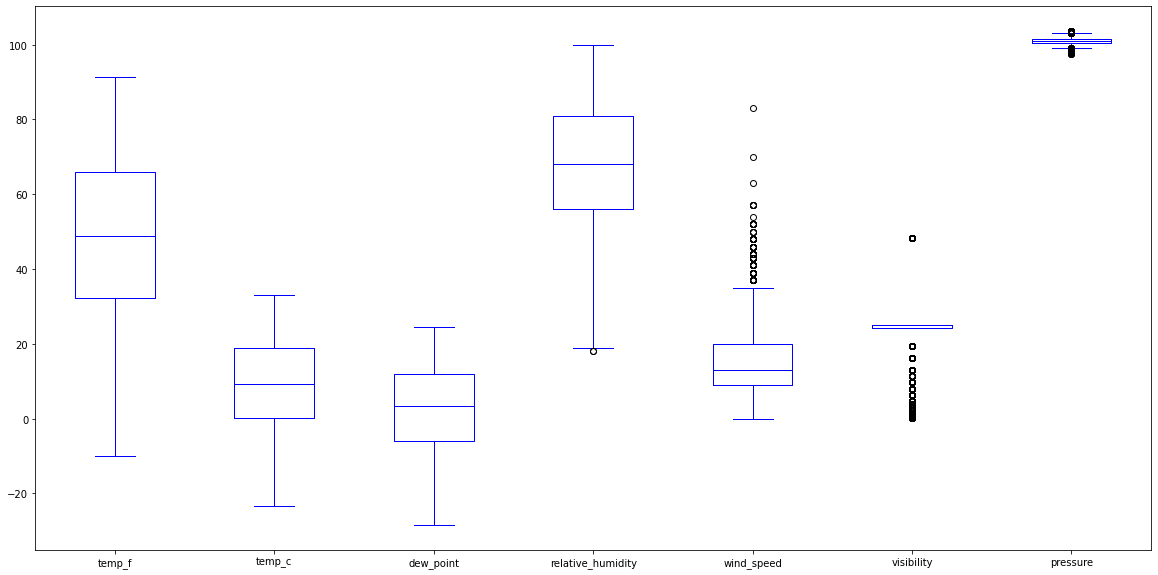

In [215]:
df.plot(kind="box", y=["temp_f", "temp_c", "dew_point", "relative_humidity", "wind_speed", "visibility", "pressure"], figsize=(20, 10), color="blue")